# Loan application prediction using Randomized Control Trial data

We want to predict what features of loan advirtismenets lead to higher loan applications

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt


In [33]:
df=pd.read_csv("adcontentworth.csv",low_memory=False)

## Data pre-processing & Exploratory Data Analysis

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58168 entries, 0 to 58167
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   wave                 58168 non-null  int64  
 1   dormancy             58168 non-null  int64  
 2   race                 57870 non-null  object 
 3   risk                 58168 non-null  object 
 4   offer4               58168 non-null  float64
 5   prize                53194 non-null  float64
 6   intshown             53194 non-null  float64
 7   trcount              57911 non-null  float64
 8   tookup               58168 non-null  int64  
 9   applied              58168 non-null  int64  
 10  badacct_last         4381 non-null   float64
 11  female               58168 non-null  int64  
 12  edhi                 58168 non-null  int64  
 13  waved3               58168 non-null  int64  
 14  dphoto_female        58168 non-null  int64  
 15  dphoto_none          53194 non-null 

In [35]:
df.describe()

,wave,dormancy,offer4,prize,intshown,trcount,tookup,applied,badacct_last,female,...,deadshort_elig,amountbrw_unc,tookup_outside_only,deadlineshortext,tookup_after_short,applied_2weeks,tookup_after_med,tookup_after_long,stripany,comp_n
count,58168.000000,58168.000000,58168.000000,53194.000000,53194.000000,57911.000000,58168.000000,58168.000000,4381.000000,58168.000000,...,53194.000000,58168.000000,58168.000000,58168.000000,58168.000000,58168.000000,58168.000000,58168.000000,58168.000000,58168.000000
mean,2.468024,10.264200,7.935057,0.250461,0.799921,4.268602,0.075316,0.087179,0.118010,0.475880,...,0.139546,110.529862,0.223198,0.032544,0.167343,0.040435,0.135040,0.108290,0.698889,0.731743
std,0.648079,6.878113,2.471379,0.433282,0.400063,3.868596,0.263903,0.282099,0.322656,0.499422,...,0.346518,531.249071,0.416394,0.177440,0.373285,0.196978,0.341769,0.310749,0.458745,0.443056
min,1.000000,0.000000,3.250000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.000000,5.990000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,9.000000,7.990000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,3.000000,16.000000,10.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,3.000000,24.000000,14.750000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,10000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
df.head()

,wave,dormancy,race,risk,offer4,prize,intshown,trcount,tookup,applied,...,deadshort_elig,amountbrw_unc,tookup_outside_only,deadlineshortext,tookup_after_short,applied_2weeks,tookup_after_med,tookup_after_long,stripany,comp_n
0,2,20,black,HIGH,9.69,1.0,1.0,16.0,0,0,...,0.0,0,0,0,0,0,0,0,1,0
1,2,16,black,HIGH,3.25,0.0,0.0,5.0,0,0,...,0.0,0,1,0,0,0,0,0,1,1
2,2,10,black,HIGH,4.44,0.0,1.0,17.0,0,0,...,0.0,0,0,0,0,0,0,0,1,0
3,2,18,black,HIGH,9.00,0.0,1.0,14.0,0,0,...,0.0,0,0,0,0,0,0,0,1,1
4,2,13,black,HIGH,9.75,1.0,0.0,14.0,0,0,...,0.0,0,0,0,0,0,0,0,1,1


In [37]:
## Getting rid of instances with null values
df = df[df["prize"].notna()].copy()

In [38]:
## Dropping leakage columns
## These variables are either defined after the decision to apply
## or directly derived from the outcome

drop_cols = [
    "tookup", # outcome variable
    "badacct_last", # default status on loan
    "amountbrw_unc", # amount borrowed
    "tookup_outside_only", # borrowing from outside lenders observed after mailer
    "tookup_after_short", # post-deadline borrowing behavior
    "applied_2weeks", # post-deadline borrowing behavior
    "tookup_after_med", # post-deadline borrowing behavior
    "tookup_after_long", # post-deadline borrowing behavior
    "wave" # we will deal with onehot encoding seperately
]
df.drop(drop_cols, axis=1, inplace=True)

In [39]:
df.columns

Index(['dormancy', 'race', 'risk', 'offer4', 'prize', 'intshown', 'trcount',
       'applied', 'female', 'edhi', 'waved3', 'dphoto_female', 'dphoto_none',
       'dphoto_black', 'gender_match', 'race_match', 'nspeakeligible',
       'speak_trt', 'oneln_trt', 'comploss_n', 'use_any', 'deadlinemed',
       'deadlinelong', 'deadlong_elig', 'deadshort_elig', 'deadlineshortext',
       'stripany', 'comp_n'],
      dtype='object')

In [40]:
# unique value counts for df[risk]
df["risk"].value_counts()

,count
risk,
HIGH,40507
LOW,7186
MEDIUM,5501


In [41]:
# check how many null values for all features
df.isnull().sum()

,0
dormancy,0
race,0
risk,0
offer4,0
prize,0
intshown,0
trcount,0
applied,0
female,0
edhi,0


In [42]:
# drop instances with null values
df.dropna(inplace=True)

In [43]:
feature_cols = [
    # user info
    "dormancy", "race", "risk", "offer4", "trcount",
    "female", "edhi",
    # deadline-related info
    "deadlinemed", "deadlinelong", "deadlineshortext",
    "deadlong_elig", "deadshort_elig",
    # treatments
    "prize", "intshown", "waved3",
    "dphoto_female", "dphoto_none", "dphoto_black",
    "gender_match", "race_match",
    "nspeakeligible", "speak_trt",
    "oneln_trt", "comploss_n",
    "use_any", "stripany", "comp_n",
]

In [44]:
## One-hot encode categorical variables risk and race
## IMPORTANT!
## We want to drop drop the baseline for logistic regression but not for other variables
## Therefore, we will have a seperate dataframe for logistic regression with dropped baselines

## 1. One-hot encoded logistic regression dataframe WITH dropped baselines
df_logreg = pd.get_dummies(
    df.copy(),
    columns=["race", "risk"],
    drop_first=True  # drop a baseline for logistic regression
)

# 2. Label-encoded dataframe instead of dummies
df = df.copy()
label_maps = {}

for col in ["race", "risk"]:
    df[col] = df[col].astype("category")
    label_maps[col] = dict(enumerate(df[col].cat.categories))
    df[col] = df[col].cat.codes

In [45]:
df_logreg.columns

Index(['dormancy', 'offer4', 'prize', 'intshown', 'trcount', 'applied',
       'female', 'edhi', 'waved3', 'dphoto_female', 'dphoto_none',
       'dphoto_black', 'gender_match', 'race_match', 'nspeakeligible',
       'speak_trt', 'oneln_trt', 'comploss_n', 'use_any', 'deadlinemed',
       'deadlinelong', 'deadlong_elig', 'deadshort_elig', 'deadlineshortext',
       'stripany', 'comp_n', 'race_coloured', 'race_indian', 'race_white',
       'risk_LOW', 'risk_MEDIUM'],
      dtype='object')

In [46]:
df.columns

Index(['dormancy', 'race', 'risk', 'offer4', 'prize', 'intshown', 'trcount',
       'applied', 'female', 'edhi', 'waved3', 'dphoto_female', 'dphoto_none',
       'dphoto_black', 'gender_match', 'race_match', 'nspeakeligible',
       'speak_trt', 'oneln_trt', 'comploss_n', 'use_any', 'deadlinemed',
       'deadlinelong', 'deadlong_elig', 'deadshort_elig', 'deadlineshortext',
       'stripany', 'comp_n'],
      dtype='object')

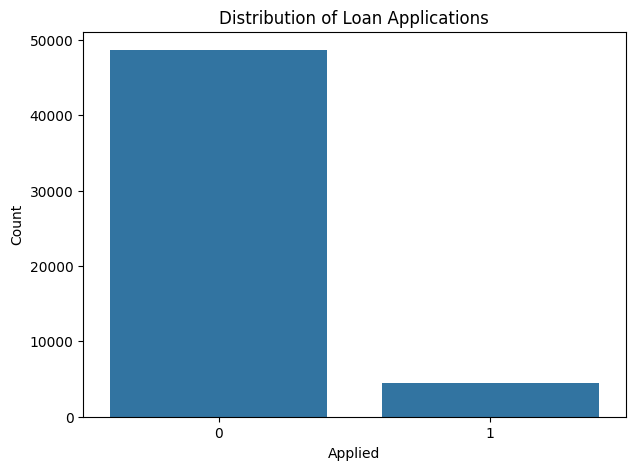

In [47]:
# Plot distribution of applied
plt.figure(figsize=(7,5))

sns.countplot(data=df, x="applied")

plt.title("Distribution of Loan Applications")
plt.xlabel("Applied")
plt.ylabel("Count")

plt.show()

In [48]:
### VERY IMPORTANT: There's a very siginifcant imbalance in our target variable.
### This is clearly going to impact the outcome of our models. Must mention it in the final report

In [49]:
# print the number of applied 1 vs applied 0
df["applied"].value_counts()

,count
applied,
0,48672
1,4522


In [50]:
## print applied 1 vs 0 ratio
df["applied"].value_counts(normalize=True)


,proportion
applied,
0,0.91499
1,0.08501


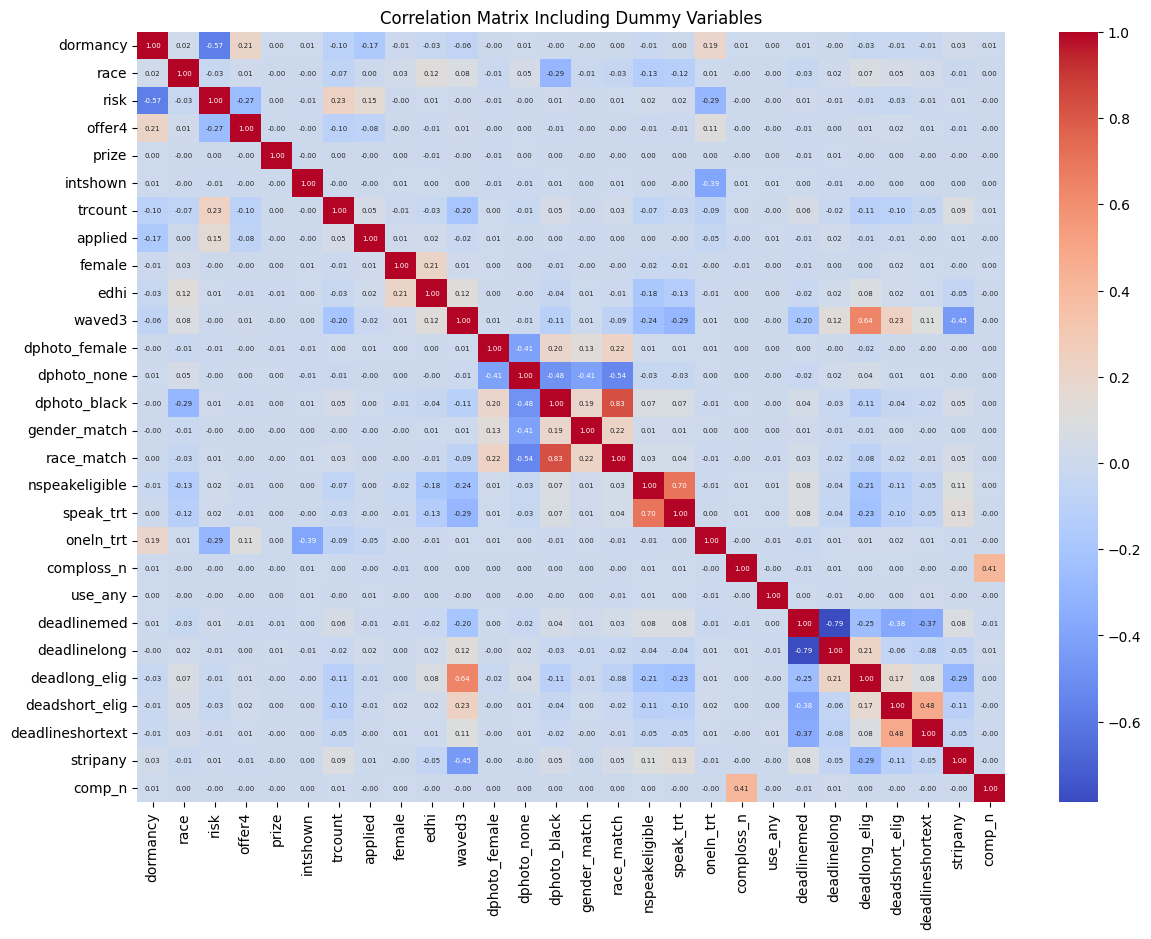

In [51]:
# converting all boolean dummy variables to integers so they show up in correlations
bool_cols = df.select_dtypes(include="bool").columns
df[bool_cols] = df[bool_cols].astype(int)

num_df = df.select_dtypes(include=[np.number])
corr_matrix = num_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap="coolwarm",fmt=".2f", annot=True, annot_kws={"size": 5})
plt.title("Correlation Matrix Including Dummy Variables")
plt.show()


In [52]:
### IMPORTANT: 'applied' is not significantly correlated with any variable. It's going to be difficult to make accurate predictions

In [53]:
## calculate VIF factors to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif_data

,feature,VIF
0,dormancy,4.906518
1,race,1.527304
2,risk,2.044670
3,offer4,11.230884
4,prize,1.329422
5,intshown,5.601945
6,trcount,2.447500
7,applied,1.132045
8,female,1.986271
9,edhi,1.795986


In [55]:
# drop deadlinemed since VIF very high
df = df.drop(columns=["deadlinemed"])
df_logreg = df_logreg.drop(columns=["deadlinemed"])

/tmp/ipython-input-3696544006.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


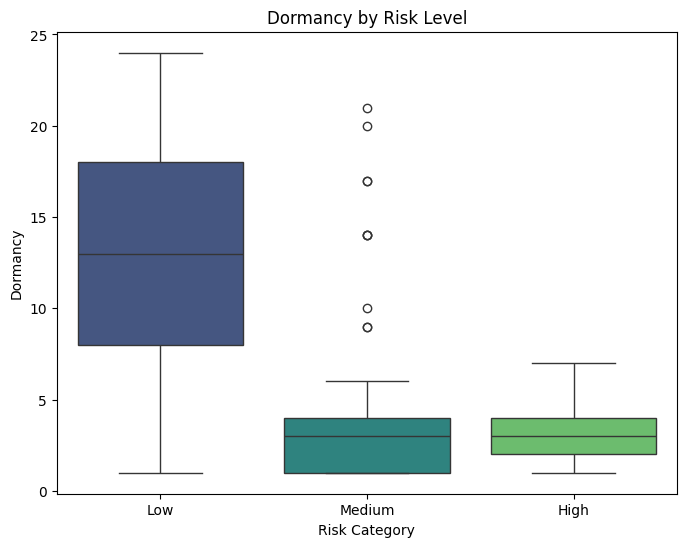

In [56]:
df_graph = df.copy()

risk_map = {0: "Low", 1: "Medium", 2: "High"}
df_graph["risk_label"] = df_graph["risk"].map(risk_map)

plt.figure(figsize=(8,6))
sns.boxplot(
    data=df_graph,
    x="risk_label",
    y="dormancy",
    palette="viridis"
)
plt.title("Dormancy by Risk Level")
plt.xlabel("Risk Category")
plt.ylabel("Dormancy")
plt.show()

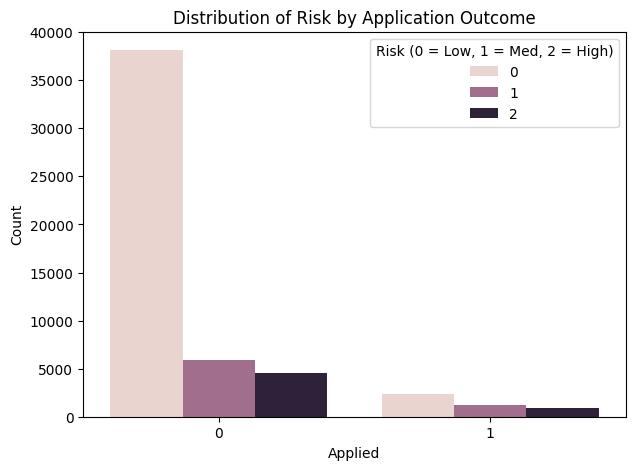

In [57]:
plt.figure(figsize=(7,5))

sns.countplot(data=df, x="applied", hue="risk")

plt.title("Distribution of Risk by Application Outcome")
plt.xlabel("Applied")
plt.ylabel("Count")
plt.legend(title="Risk (0 = Low, 1 = Med, 2 = High)")

plt.show()

Text(0, 0.5, 'Count')

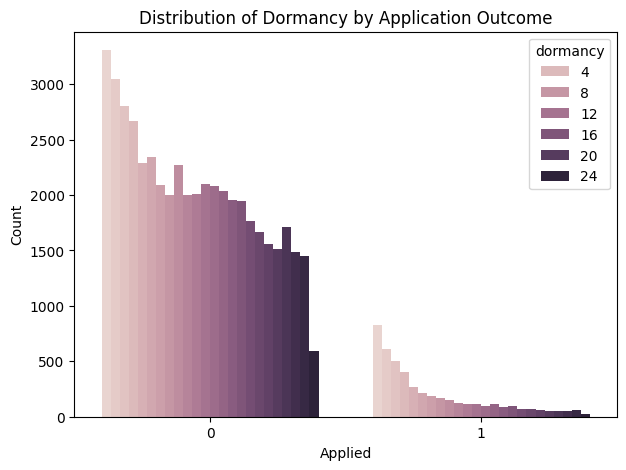

In [58]:
# Distribution of dormancy by application outcome
plt.figure(figsize=(7,5))

sns.countplot(data=df, x="applied", hue="dormancy")

plt.title("Distribution of Dormancy by Application Outcome")
plt.xlabel("Applied")
plt.ylabel("Count")

## Baseline: Logistic Regression

In [59]:
numeric_to_scale = [
    "dormancy",   # time since last loan
    "offer4",     # interest rate
    "trcount",    # number of previous loans
]

df_logreg = df_logreg.copy()
target = "applied"
X = df_logreg[df_logreg.drop(columns=target).columns]
y = df_logreg[target]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_to_scale),
    ],
    remainder="passthrough"   # keep the other features as they are
)

log_reg_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", LogisticRegression(
            max_iter=1000,
            class_weight="balanced",
            n_jobs=-1,
            solver="liblinear"
        ))
    ]
)

# fit the model
log_reg_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['dormancy', 'offer4',
                                                   'trcount'])])),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    n_jobs=-1, solver='liblinear'))])

In [60]:
y_pred = log_reg_pipeline.predict(X_test)
y_proba = log_reg_pipeline.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

print("\nCONFUSION MATRIX")
print(confusion_matrix(y_test, y_pred))

print("\nROC-AUC")
print(roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.95      0.66      0.78      9735
           1       0.15      0.64      0.24       904

    accuracy                           0.66     10639
   macro avg       0.55      0.65      0.51     10639
weighted avg       0.88      0.66      0.74     10639


CONFUSION MATRIX
[[6449 3286]
 [ 321  583]]

ROC-AUC
0.7031077991554968


In [61]:
import ipywidgets as ipw
import matplotlib.pyplot as plt
import sklearn.metrics as sk_m

def inspect_threshold(threshold):
    y_pred = (y_proba >= threshold).astype(int)

    cm = sk_m.confusion_matrix(y_test, y_pred)

    tn, fp, fn, tp = cm.ravel()

    # true positive rate (recall for class 1)
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    # false positive rate
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0.0

    print("Threshold:", threshold)
    print("Confusion matrix:\n", cm)
    print(f"\nTrue positive rate (TPR / recall for 1):  {tpr:.3f}")
    print(f"False positive rate (FPR):               {fpr:.3f}")
    print(f"F1 score:                                {sk_m.f1_score(y_test, y_pred):.3f}")
    print(f"Recall:                                  {sk_m.recall_score(y_test, y_pred):.3f}")

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    print(f"Precision:                               {precision:.3f}")

# interactive slider
ipw.interact(
    inspect_threshold,
    threshold=ipw.FloatSlider(min=0.0, max=1.0, step=0.01, value=0.5)
)

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

<function __main__.inspect_threshold(threshold)>

In [62]:
from sklearn.metrics import confusion_matrix, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

def explore_threshold(threshold):
    idx = np.argmin(np.abs(thresholds - threshold))
    thr = thresholds[idx]

    y_pred = (y_proba >= thr).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    tpr_val = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    fpr_val = fp / (fp + tn) if (fp + tn) > 0 else 0.0

    print(f"Requested threshold: {threshold:.3f}")
    print(f"Nearest ROC threshold: {thr:.3f}")
    print(f"True Positive Rate (TPR): {tpr_val:.3f}")
    print(f"False Positive Rate (FPR): {fpr_val:.3f}")
    print("Confusion matrix (tn, fp, fn, tp):")
    print(cm)

    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label="ROC curve")
    plt.scatter(fpr[idx], tpr[idx], color="red", s=50, label="Current point")
    plt.plot([0, 1], [0, 1], "k--", alpha=0.5)

    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC curve with interactive threshold")
    plt.legend()
    plt.grid(True)
    plt.show()

ipw.interact(
    explore_threshold,
    threshold=ipw.FloatSlider(min=0.0, max=1.0, step=0.01, value=0.5)
)

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

<function __main__.explore_threshold(threshold)>

In [63]:
import statsmodels.api as sm

df_sm = df_logreg.copy()
target = "applied"

X = df_sm.drop(columns=[target])
y = df_sm[target].astype(int)
X = X.astype(float)

X_const = sm.add_constant(X)

logit_model = sm.Logit(y, X_const)
logit_result = logit_model.fit()

print(logit_result.summary())

Optimization terminated successfully.
         Current function value: 0.272495
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                applied   No. Observations:                53194
Model:                          Logit   Df Residuals:                    53164
Method:                           MLE   Df Model:                           29
Date:                Sun, 14 Dec 2025   Pseudo R-squ.:                 0.06307
Time:                        20:19:58   Log-Likelihood:                -14495.
converged:                       True   LL-Null:                       -15471.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.5611      0.121    -12.939      0.000      -1.798      -1.325
dormancy   

In [64]:
## Based on the results above, statistically significant variables are
## dormancy, offer4, prize, edhi, dphoto_female, oneln_trt, use_any, deadlinemed,
## deadlinelong, deadshort_elig, deadlineshortext, race_coloured, risk_LOW, risk_MEDIUM, waved3

In [65]:
# The imbalance of the dataset could explain why the model did not do great
# Let's randomly undersample the dataset, and see how the logistic regression performs
# If we get good results, we can attribute the bad performance of model to the imbalance of dataset
# If not, it could either be that:
# 1) logistic regression is not the best model for our data
# 2) our data does not have high predictability

from sklearn.utils import resample


df_logreg_undersamp = df_logreg.copy()
target = "applied"

# separate majority and minority classes
df_majority = df_logreg_undersamp[df_logreg_undersamp[target] == 0]
df_minority = df_logreg_undersamp[df_logreg_undersamp[target] == 1]

# downsample majority class
df_majority_down = resample(df_majority,replace=False, n_samples=len(df_minority), random_state=42)

# combine minority and downsampled majority
df_logreg_balanced = pd.concat([df_majority_down, df_minority])

# shuffle
df_logreg_balanced = df_logreg_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


In [66]:
print(df_logreg_balanced[target].value_counts())

applied
0    4522
1    4522
Name: count, dtype: int64


In [67]:
numeric_to_scale = [
    "dormancy",   # time since last loan
    "offer4",     # interest rate
    "trcount",    # number of previous loans
]

df_logreg = df_logreg_balanced.copy()
target = "applied"
X = df_logreg[df_logreg.drop(columns=target).columns]
y = df_logreg[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_to_scale),
    ],
    remainder="passthrough"   # keep the other features as they are
)

log_reg_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", LogisticRegression(
            max_iter=1000,
            class_weight="balanced",
            n_jobs=-1,
            solver="liblinear"
        ))
    ]
)

# fit the model
log_reg_pipeline.fit(X_train, y_train)

y_pred = log_reg_pipeline.predict(X_test)
y_proba = log_reg_pipeline.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

print("\nCONFUSION MATRIX")
print(confusion_matrix(y_test, y_pred))

print("\nROC-AUC")
print(roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.64      0.66      0.65       905
           1       0.65      0.63      0.64       904

    accuracy                           0.65      1809
   macro avg       0.65      0.65      0.65      1809
weighted avg       0.65      0.65      0.65      1809


CONFUSION MATRIX
[[598 307]
 [331 573]]

ROC-AUC
0.6883831222803501


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


## KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier

df_knn = df.copy()

target = "applied"

X = df_knn.drop(columns=[target])
y = df_knn[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

knn_pipeline = Pipeline([
    ("scaler", StandardScaler()),              # MUST scale for KNN
    ("knn", KNeighborsClassifier(
        n_neighbors=200,                         # simple baseline
        weights="distance",                    # helps with imbalance
        n_jobs=-1
    ))
])

knn_pipeline.fit(X_train, y_train)

y_pred = knn_pipeline.predict(X_test)
y_proba = knn_pipeline.predict_proba(X_test)[:, 1]

print("=== KNN CLASSIFICATION REPORT ===\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nROC-AUC:", roc_auc_score(y_test, y_proba))


=== KNN CLASSIFICATION REPORT ===

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     14602
           1       0.33      0.00      0.00      1357

    accuracy                           0.91     15959
   macro avg       0.62      0.50      0.48     15959
weighted avg       0.87      0.91      0.87     15959

Confusion Matrix:
[[14600     2]
 [ 1356     1]]

ROC-AUC: 0.669807045339687


In [69]:
### KNN is seriously impacted by the imbalance of our data. It's not the most suitable for our case!

  0%|          | 0/20 [00:00<?, ?it/s]

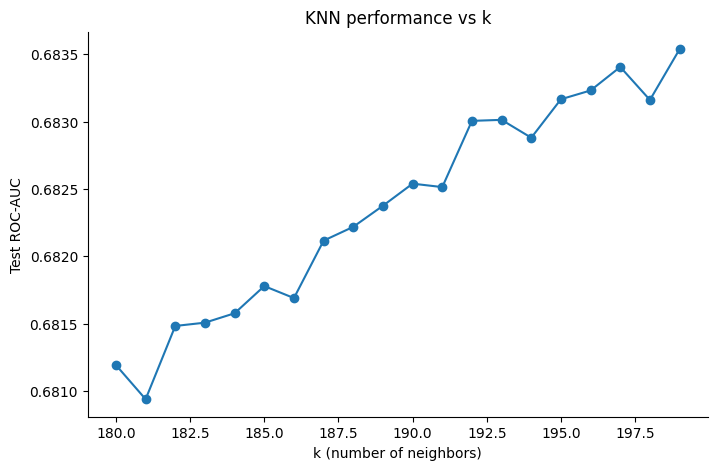

Best k: 199 with ROC-AUC = 0.6835


In [70]:
from tqdm.auto import tqdm

k_values = range(180, 200)
auc_scores = []

for k in tqdm(k_values):
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), numeric_to_scale),
        ],
        remainder="passthrough"
    )

    knn_clf = KNeighborsClassifier(
        n_neighbors=k,
        weights="distance",
        n_jobs=-1
    )

    knn_pipeline = Pipeline(
        steps=[
            ("preprocess", preprocessor),
            ("model", knn_clf)
        ]
    )

    knn_pipeline.fit(X_train, y_train)
    y_proba = knn_pipeline.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    auc_scores.append(auc)

# Plot k vs AUC
plt.figure(figsize=(8, 5))
plt.plot(list(k_values), auc_scores, marker="o")
plt.xlabel("k (number of neighbors)")
plt.ylabel("Test ROC-AUC")
plt.title("KNN performance vs k")
sns.despine()
plt.show()

best_idx = int(np.argmax(auc_scores))
best_k = list(k_values)[best_idx]
best_auc = auc_scores[best_idx]

print(f"Best k: {best_k} with ROC-AUC = {best_auc:.4f}")

In [71]:
## Best k being so large proves how high-dimensional and sparse our data is

## Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score
)

df_rf = df.copy()

target = "applied"

X = df_rf.drop(columns=[target])
y = df_rf[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

rf = RandomForestClassifier(
    n_estimators=300,     # reasonable baseline
    max_depth=None,      # let trees grow fully
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight="balanced",   # VERY important for imbalanced data
    n_jobs=-1,
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=300, n_jobs=-1,
                       random_state=42)

In [73]:
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nROC-AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      9735
           1       0.29      0.00      0.00       904

    accuracy                           0.91     10639
   macro avg       0.60      0.50      0.48     10639
weighted avg       0.86      0.91      0.87     10639

Confusion Matrix:
[[9730    5]
 [ 902    2]]

ROC-AUC: 0.6627357836653621


In [74]:
### Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold


param_distributions = {
    "n_estimators": [100, 200],
    "min_samples_split": [2, 10],
    "min_samples_leaf": [2, 8],
    "max_features": [0.5, 1.0],
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=40,
    scoring="roc_auc",
    n_jobs=-1,
    cv=cv,
    verbose=1,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best params:", random_search.best_params_)
print("Best CV ROC-AUC:", random_search.best_score_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 16 is smaller than n_iter=40. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 0.5}
Best CV ROC-AUC: 0.6685306186874738


In [75]:
# Refit best model on full training set
best_rf = random_search.best_estimator_

y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

print("\nTest Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nTest ROC-AUC:", roc_auc_score(y_test, y_proba))


Test Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      9735
           1       0.20      0.21      0.21       904

    accuracy                           0.86     10639
   macro avg       0.56      0.57      0.56     10639
weighted avg       0.86      0.86      0.86     10639

Confusion Matrix:
[[8986  749]
 [ 715  189]]

Test ROC-AUC: 0.6830344846394044


/tmp/ipython-input-446863230.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


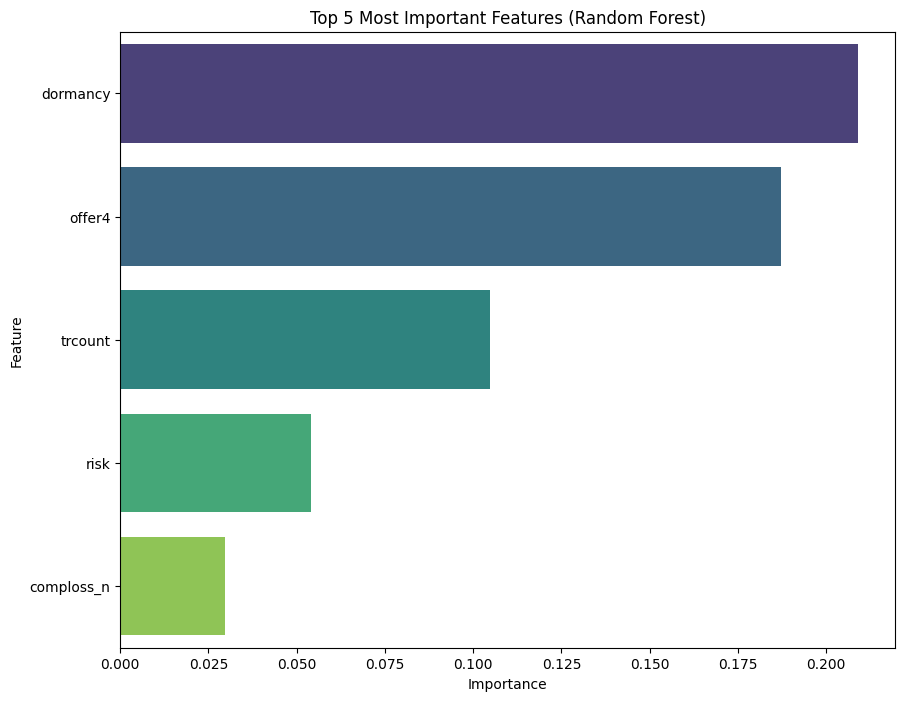

In [76]:
# select feature importances
importances = best_rf.feature_importances_
feature_names = X_train.columns

feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(5)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title("Top 5 Most Important Features (Random Forest)")
plt.show()

## XGBoost

In [77]:
!pip install xgboost

In [78]:
from xgboost import XGBClassifier
target = "applied"

X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

neg = (y_train == 0).sum()
pos = (y_train == 1).sum()
scale_pos_weight = neg / pos
print(f"scale_pos_weight = {scale_pos_weight:.2f}")

xgb_model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    scale_pos_weight=scale_pos_weight,
    n_jobs=-1,
    random_state=42,
    tree_method="hist"
)

xgb_model.fit(X_train, y_train)

scale_pos_weight = 10.76


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=-1,
              num_parallel_tree=None, ...)

              precision    recall  f1-score   support

           0       0.95      0.70      0.81      9735
           1       0.16      0.60      0.25       904

    accuracy                           0.69     10639
   macro avg       0.55      0.65      0.53     10639
weighted avg       0.88      0.69      0.76     10639


CONFUSION MATRIX
[[6837 2898]
 [ 364  540]]

ROC-AUC
0.6872775111244438


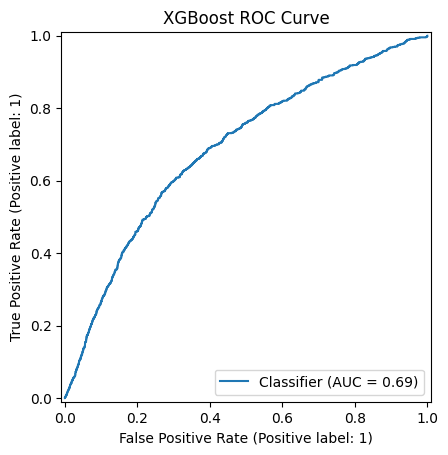

In [79]:
from sklearn.metrics import RocCurveDisplay

y_proba = xgb_model.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

print(classification_report(y_test, y_pred))

print("\nCONFUSION MATRIX")
print(confusion_matrix(y_test, y_pred))

print("\nROC-AUC")
print(roc_auc_score(y_test, y_proba))

RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("XGBoost ROC Curve")
plt.show()

In [80]:
## Hyperparameter tuning

param_distributions = {
    "n_estimators": [200, 300],
    "learning_rate": [0.01, 0.1],
    "max_depth": [3, 5]
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

xgb_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions,
    n_iter=40,
    scoring="roc_auc",
    n_jobs=-1,
    cv=cv,
    verbose=1,
    random_state=42,
)

xgb_search.fit(X_train, y_train)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=40. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=0.8, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=4,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=500, n_jobs=-1,
                                           num_parallel_tree=None, ...),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1],
                                        'max_depth': [3, 5],
                                        'n_estimators': [200, 300]},
                   random_state=42, scoring='roc_auc', verbose=1)

Best params: {'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.01}
Best CV ROC-AUC: 0.6855863626453432
              precision    recall  f1-score   support

           0       0.95      0.69      0.80      9735
           1       0.16      0.62      0.25       904

    accuracy                           0.69     10639
   macro avg       0.56      0.66      0.53     10639
weighted avg       0.88      0.69      0.76     10639


CONFUSION MATRIX (Test)
[[6765 2970]
 [ 344  560]]

Test ROC-AUC
0.701561171941403


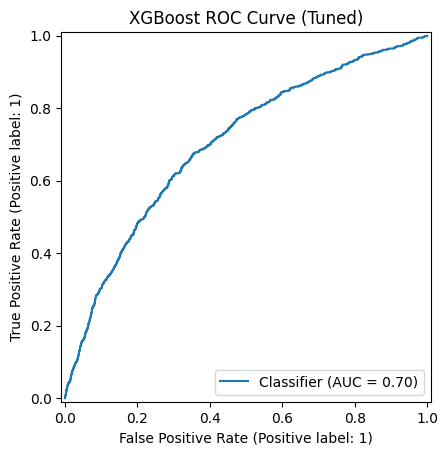

In [81]:
print("Best params:", xgb_search.best_params_)
print("Best CV ROC-AUC:", xgb_search.best_score_)

# best model
best_xgb = xgb_search.best_estimator_

# evaluate on test set
y_proba = best_xgb.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

print(classification_report(y_test, y_pred))

print("\nCONFUSION MATRIX (Test)")
print(confusion_matrix(y_test, y_pred))

print("\nTest ROC-AUC")
print(roc_auc_score(y_test, y_proba))

RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("XGBoost ROC Curve (Tuned)")
plt.show()

/tmp/ipython-input-1303692520.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


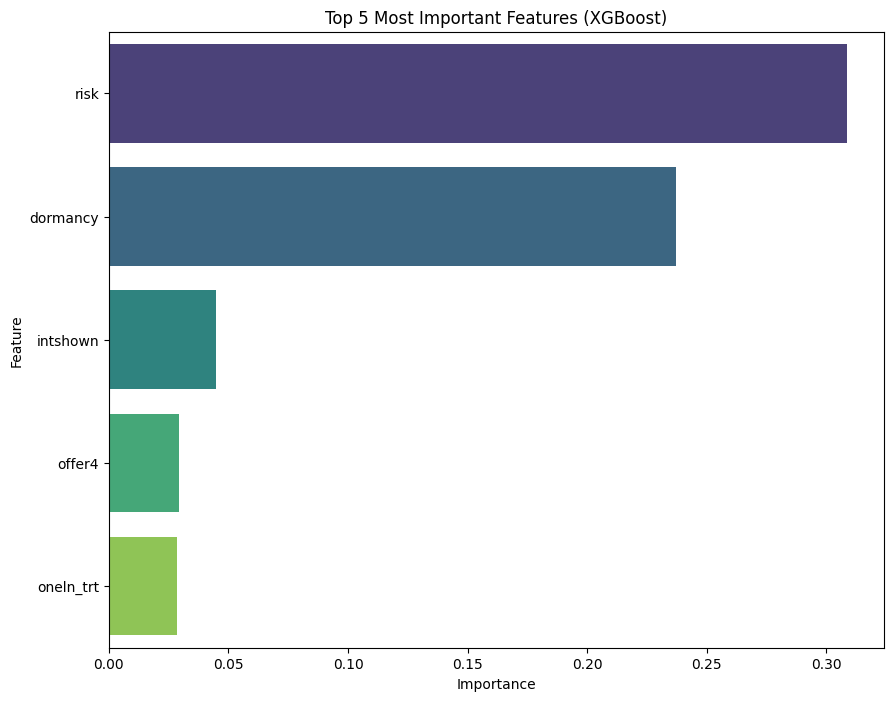

In [82]:
importances = best_xgb.feature_importances_
feature_names = X_train.columns

feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(5)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title("Top 5 Most Important Features (XGBoost)")
plt.show()


## LightGBM

In [83]:
!pip install lightgbm

In [84]:
import lightgbm as lgb

df = df.copy()

target = "applied"
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

lgb_clf = lgb.LGBMClassifier(
    objective="binary",
    n_estimators=300,
    learning_rate=0.05,
    num_leaves=31,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    class_weight="balanced",
    n_jobs=-1,
    random_state=42
)

lgb_clf.fit(X_train, y_train)

y_pred = lgb_clf.predict(X_test)
y_proba = lgb_clf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

print("\nCONFUSION MATRIX")
print(confusion_matrix(y_test, y_pred))

print("\nROC-AUC")
print(roc_auc_score(y_test, y_proba))


[LightGBM] [Info] Number of positive: 3618, number of negative: 38937
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 151
[LightGBM] [Info] Number of data points in the train set: 42555, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
              precision    recall  f1-score   support

           0       0.95      0.73      0.82      9735
           1       0.16      0.56      0.25       904

    accuracy                           0.71     10639
   macro avg       0.55      0.64      0.54     10639
weighted avg       0.88      0.71      0.77     10639


CONFUSION MATRIX
[[7076 2659]
 [ 396  508]]

ROC-AUC
0.689635631854771


In [85]:
## hyperparameter tuning

param_distributions = {
    "n_estimators": [200, 500],
    "learning_rate": [0.01, 0.1],
    "num_leaves": [15, 30],
    "max_depth": [3, 8]
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

lgb_search = RandomizedSearchCV(
    estimator=lgb_clf,
    param_distributions=param_distributions,
    n_iter=40,
    scoring="roc_auc",
    n_jobs=-1,
    cv=cv,
    verbose=1,
    random_state=42,
)

lgb_search.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 16 is smaller than n_iter=40. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[LightGBM] [Info] Number of positive: 3618, number of negative: 38937
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 151
[LightGBM] [Info] Number of data points in the train set: 42555, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=LGBMClassifier(class_weight='balanced',
                                            colsample_bytree=0.8,
                                            learning_rate=0.05,
                                            n_estimators=300, n_jobs=-1,
                                            objective='binary', random_state=42,
                                            subsample=0.8),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1],
                                        'max_depth': [3, 8],
                                        'n_estimators': [200, 500],
                                        'num_leaves': [15, 30]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [86]:
print("Best params:", lgb_search.best_params_)
print("Best CV ROC-AUC:", lgb_search.best_score_)

best_lgb = lgb_search.best_estimator_

y_proba = best_lgb.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

print(classification_report(y_test, y_pred))

print("\nCONFUSION MATRIX (Test)")
print(confusion_matrix(y_test, y_pred))

print("\nTest ROC-AUC")
print(roc_auc_score(y_test, y_proba))

Best params: {'num_leaves': 15, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.01}
Best CV ROC-AUC: 0.6846531781087372
              precision    recall  f1-score   support

           0       0.95      0.69      0.80      9735
           1       0.16      0.62      0.25       904

    accuracy                           0.69     10639
   macro avg       0.55      0.66      0.53     10639
weighted avg       0.88      0.69      0.75     10639


CONFUSION MATRIX (Test)
[[6740 2995]
 [ 343  561]]

Test ROC-AUC
0.7013094799805466


/tmp/ipython-input-2747510045.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


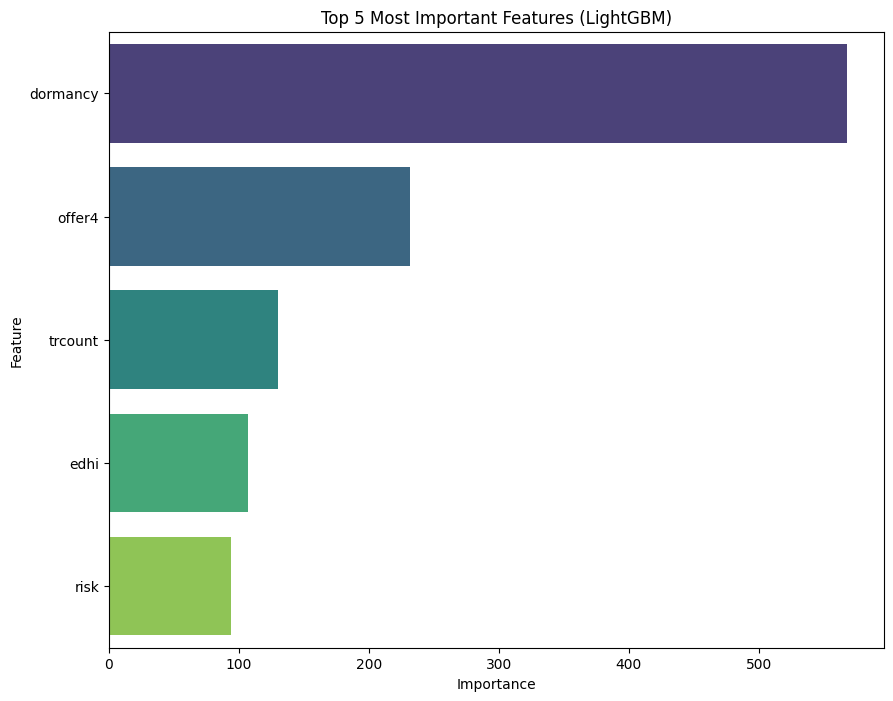

In [87]:
importances = best_lgb.feature_importances_
feature_names = X_train.columns

feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(5)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title("Top 5 Most Important Features (LightGBM)")
plt.show()

# Dense Neural Networks

In [88]:
from sklearn.utils.class_weight import compute_class_weight

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [89]:
model_df = df.copy()

target = "applied"
X = model_df.drop(columns=[target])
y = model_df[target].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

input_dim = x_train.shape[1]
print("Input dim:", input_dim)

# Optional: class weights for imbalance
classes = np.unique(y_train)
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=classes,
    y=y_train
)
class_weight_dict = {cls: w for cls, w in zip(classes, class_weights)}
print("Class weights:", class_weight_dict)

Input dim: 26
Class weights: {np.int64(0): np.float64(0.5464596656136836), np.int64(1): np.float64(5.881011608623549)}


In [90]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# function to build a neural network model
def build_model(hidden_layers=1, nodes_per_layer=64, activation='relu', input_dim=input_dim):
    model = Sequential()

    # input + first hidden layer
    model.add(Dense(nodes_per_layer, activation=activation, input_shape=(input_dim,)))

    # additional hidden layers
    if hidden_layers > 1:
        for _ in range(hidden_layers - 1):
            model.add(Dense(nodes_per_layer, activation=activation))

    # output layer for BINARY classification
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# function to train and evaluate the model
def train_and_evaluate(hidden_layers, nodes_per_layer, activation,
                       epochs=5, batch_size=256,
                       use_class_weight=True):
    model = build_model(
        hidden_layers=hidden_layers,
        nodes_per_layer=nodes_per_layer,
        activation=activation,
        input_dim=input_dim
    )

    # class_weight to handle imbalance
    cw = class_weight_dict if use_class_weight else None

    history = model.fit(
        x_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, y_test),
        class_weight=cw,
        verbose=0   # set to 1 or 2 if you want logs
    )

    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    return history, accuracy, model


In [91]:
## test hidden layers

hidden_layer_configs = [1, 2, 3, 4, 5]

hidden_layer_results = []

for hl in hidden_layer_configs:
    print(f"Training model with {hl} hidden layer(s)")
    history, acc, model_hl= train_and_evaluate(
        hidden_layers=hl,
        nodes_per_layer=64,
        activation='relu',
        epochs=10,
        batch_size=256
    )
    hidden_layer_results.append((hl, history, acc, model_hl))

# Print results
for hl, history, acc, model_hl in hidden_layer_results:
    print(f"Hidden Layers: {hl}, Accuracy: {acc*100:.2f}%")


Training model with 1 hidden layer(s)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model with 2 hidden layer(s)
Training model with 3 hidden layer(s)
Training model with 4 hidden layer(s)
Training model with 5 hidden layer(s)
Hidden Layers: 1, Accuracy: 67.03%
Hidden Layers: 2, Accuracy: 69.79%
Hidden Layers: 3, Accuracy: 65.87%
Hidden Layers: 4, Accuracy: 61.91%
Hidden Layers: 5, Accuracy: 66.23%


In [92]:
## test number of nodes

node_configs = [2, 4 , 8, 16, 32]
hidden_layers = 2
activation = 'relu'
node_results = []

for n in node_configs:
    print(f"Training model with {hidden_layers} hidden layers and {n} nodes per layer")
    history, accuracy, model_hl= train_and_evaluate(
        hidden_layers=hidden_layers,
        nodes_per_layer=n,
        activation=activation,
        epochs=10,
        batch_size=256
    )
    node_results.append((n, history, accuracy, model_hl))

for n, history, acc, model_hl in node_results:
    print(f"Nodes per Layer: {n}, Accuracy: {acc*100:.2f}%")

Training model with 2 hidden layers and 2 nodes per layer
Training model with 2 hidden layers and 4 nodes per layer
Training model with 2 hidden layers and 8 nodes per layer
Training model with 2 hidden layers and 16 nodes per layer
Training model with 2 hidden layers and 32 nodes per layer
Nodes per Layer: 2, Accuracy: 67.72%
Nodes per Layer: 4, Accuracy: 62.62%
Nodes per Layer: 8, Accuracy: 66.39%
Nodes per Layer: 16, Accuracy: 62.42%
Nodes per Layer: 32, Accuracy: 63.40%


In [93]:
## test activation functions

activation_configs = ['relu', 'tanh', 'sigmoid']
hidden_layers = 2
nodes_per_layer = 32

activation_results = []

for act in activation_configs:
    print(f"Training model with {hidden_layers} hidden layers, {nodes_per_layer} nodes, activation={act}")
    history, accuracy, model_hl = train_and_evaluate(
        hidden_layers=hidden_layers,
        nodes_per_layer=nodes_per_layer,
        activation=act,
        epochs=10,
        batch_size=256
    )
    activation_results.append((act, history, accuracy, model_hl))

for act, history, acc, model_hl in activation_results:
    print(f"Activation: {act}, Accuracy: {acc*100:.2f}%")


Training model with 2 hidden layers, 32 nodes, activation=relu
Training model with 2 hidden layers, 32 nodes, activation=tanh
Training model with 2 hidden layers, 32 nodes, activation=sigmoid
Activation: relu, Accuracy: 64.90%
Activation: tanh, Accuracy: 61.61%
Activation: sigmoid, Accuracy: 65.83%


In [94]:
import matplotlib.pyplot as plt

def plot_experiment_results(results, parameter_name):
    plt.figure(figsize=(10, 6))
    for value, history, acc in results:
        val_acc = history.history.get('val_accuracy')
        if val_acc is None:
            continue
        epochs = range(1, len(val_acc) + 1)
        plt.plot(epochs, val_acc, label=f"{parameter_name} = {value}")

    plt.xlabel("Epochs")
    plt.ylabel("Validation Accuracy")
    plt.title(f"{parameter_name} – Validation Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

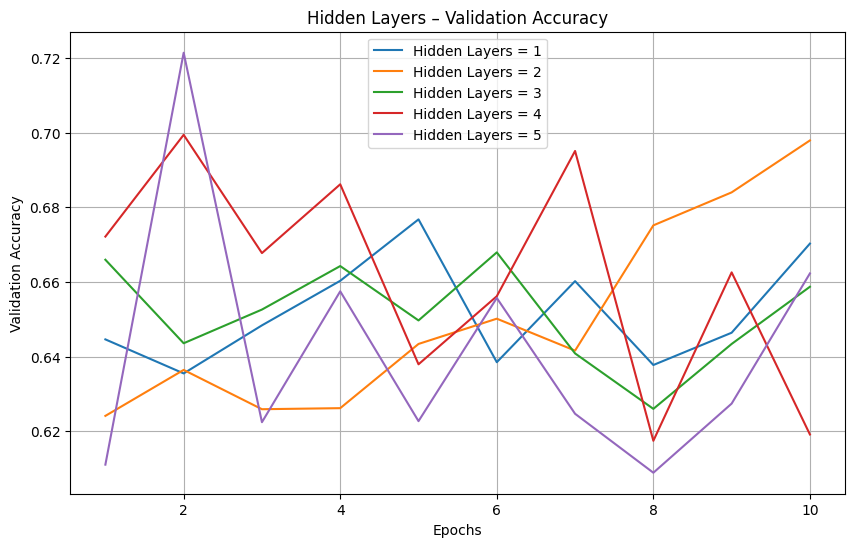

In [95]:
hidden_layer_results_simple = [
    (hl, history, acc) for (hl, history, acc,model_h) in hidden_layer_results
]
plot_experiment_results(hidden_layer_results_simple, "Hidden Layers")

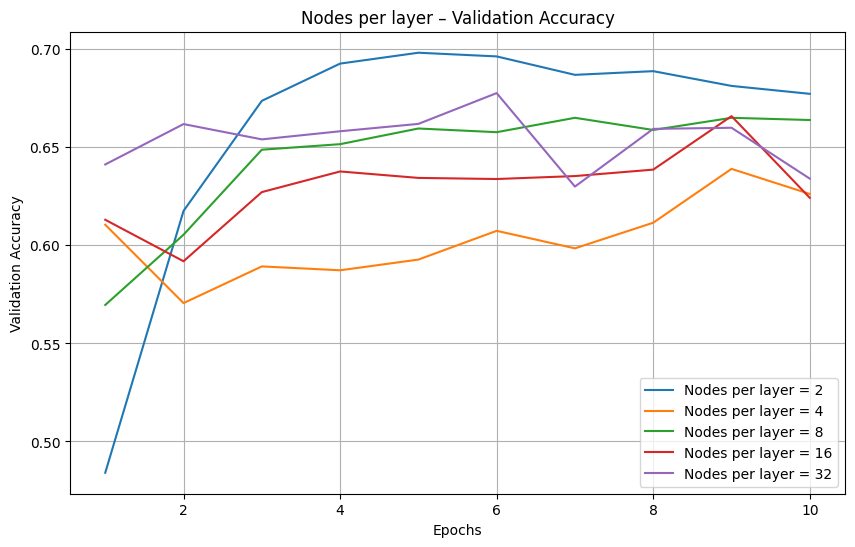

In [96]:
node_results = [
    (hl, history, acc) for (hl, history, acc, model_h) in node_results
]
plot_experiment_results(node_results, "Nodes per layer")

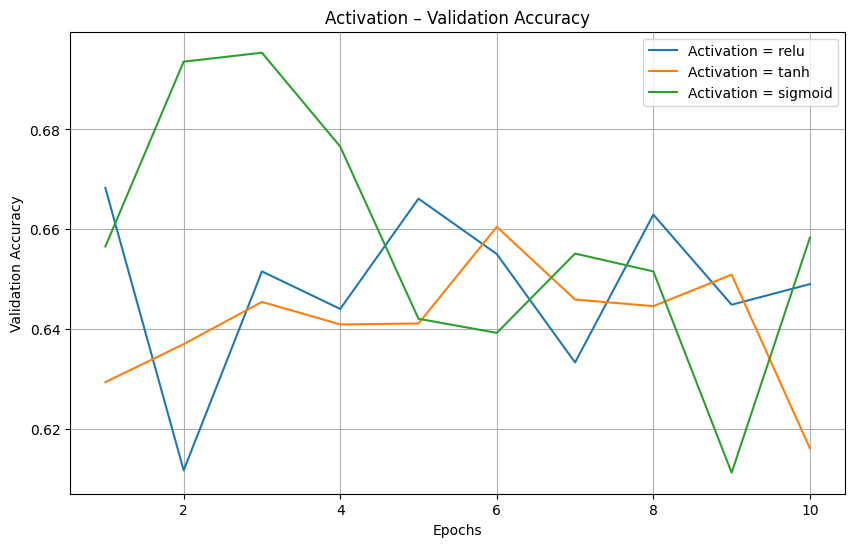

In [97]:
activation_results = [
    (hl, history, acc) for (hl, history, acc, model_h) in activation_results
]

plot_experiment_results(activation_results, "Activation")

In [98]:
history, acc, model_nn = train_and_evaluate(
    hidden_layers=2,
    nodes_per_layer=32,
    activation='relu',
    epochs=10,
    batch_size=256
)

print(f"Test accuracy: {acc*100:.2f}%")

Test accuracy: 66.22%


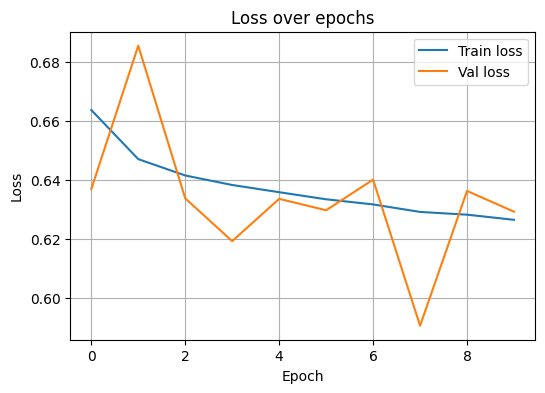

In [99]:
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.legend()
plt.grid(True)
plt.show()


In [100]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    average_precision_score
)

y_proba_nn = model_nn.predict(X_test).ravel()
threshold = 0.2
y_pred_nn = (y_proba_nn >= threshold).astype(int)

cm = confusion_matrix(y_test, y_pred_nn)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_nn, digits=4))

roc_auc = roc_auc_score(y_test, y_proba_nn)
print(f"\nROC-AUC: {roc_auc:.4f}")


333/333 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step
Confusion Matrix:
[[9479  256]
 [ 842   62]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9184    0.9737    0.9453      9735
           1     0.1950    0.0686    0.1015       904

    accuracy                         0.8968     10639
   macro avg     0.5567    0.5211    0.5234     10639
weighted avg     0.8569    0.8968    0.8736     10639


ROC-AUC: 0.6895


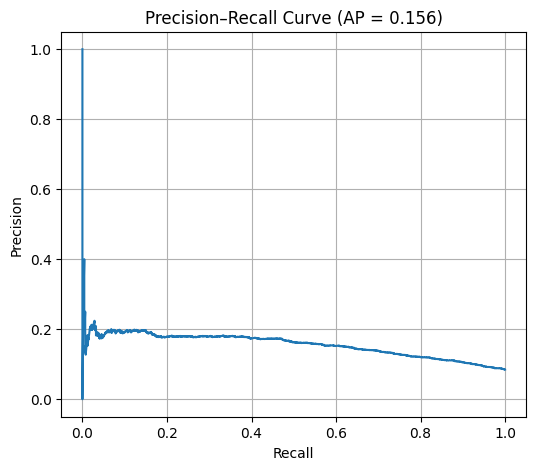

In [101]:
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_proba_nn)
avg_prec = average_precision_score(y_test, y_proba_nn)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision–Recall Curve (AP = {avg_prec:.3f})")
plt.grid(True)
plt.show()

In [102]:
def print_metrics_at_threshold(t):
    preds = (y_proba_nn >= t).astype(int)
    cm = confusion_matrix(y_test, preds)
    print(f"\n=== Threshold = {t:.2f} ===")
    print("Confusion Matrix:")
    print(cm)
    print(classification_report(y_test, preds, digits=4))

for t in [0.2, 0.3, 0.5, 0.7]:
    print_metrics_at_threshold(t)



=== Threshold = 0.20 ===
Confusion Matrix:
[[9479  256]
 [ 842   62]]
              precision    recall  f1-score   support

           0     0.9184    0.9737    0.9453      9735
           1     0.1950    0.0686    0.1015       904

    accuracy                         0.8968     10639
   macro avg     0.5567    0.5211    0.5234     10639
weighted avg     0.8569    0.8968    0.8736     10639


=== Threshold = 0.30 ===
Confusion Matrix:
[[9727    8]
 [ 900    4]]
              precision    recall  f1-score   support

           0     0.9153    0.9992    0.9554      9735
           1     0.3333    0.0044    0.0087       904

    accuracy                         0.9147     10639
   macro avg     0.6243    0.5018    0.4821     10639
weighted avg     0.8659    0.9147    0.8750     10639


=== Threshold = 0.50 ===
Confusion Matrix:
[[9735    0]
 [ 904    0]]
              precision    recall  f1-score   support

           0     0.9150    1.0000    0.9556      9735
           1     0.0000 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

##

##